## Assignment: Matplot

#### Submitted By: Ayesha

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Problem 01: “Advanced Plot Customization and Axes Control”

In [2]:
x = np.linspace(1, 10, 100)
y1 = np.sin(x)  
y2 = np.exp(x)

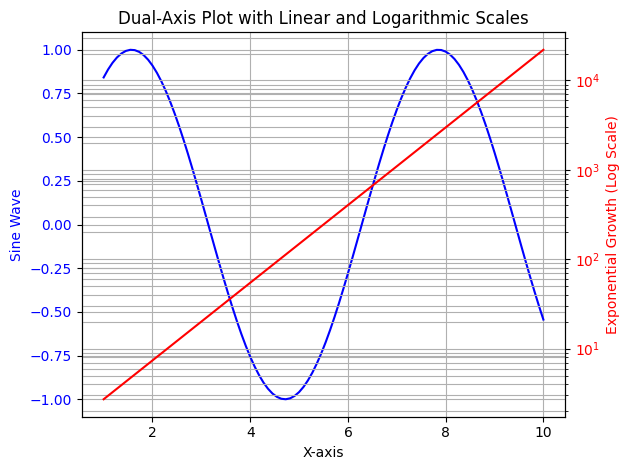

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='b', label='Sine Wave (Linear)')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Sine Wave', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)  

ax2 = ax1.twinx() 
ax2.plot(x, y2, color='r', label='Exponential Growth (Logarithmic)')
ax2.set_ylabel('Exponential Growth (Log Scale)', color='r')
ax2.set_yscale('log') 
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(True, which='both', axis='y')

plt.title('Dual-Axis Plot with Linear and Logarithmic Scales')
fig.tight_layout() 
plt.show()

#### Problem 02: “Interactive Plotting with Widgets”

In [5]:
from matplotlib.widgets import Slider

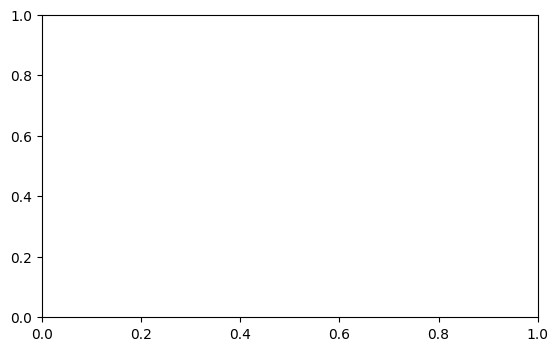

In [4]:
fig= plt.subplots()
plt.subplots_adjust(bottom=0.25)

initial_amplitude = 1.0
initial_frequency = 1.0
initial_phase = 0.0
x = np.linspace(0, 10, 1000)
y = initial_amplitude * np.sin(initial_frequency * x + initial_phase)

AttributeError: 'tuple' object has no attribute 'plot'

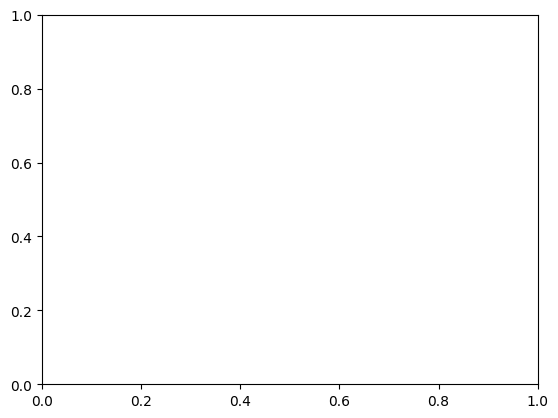

In [5]:
ax=plt.subplots()
line, = ax.plot(x, y, lw=2)

ax.set_ylim(-5, 5)
ax.set_xlim(0, 10)
ax.set_title('Interactive Sine Wave')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')

axcolor = 'lightgoldenrodyellow'
ax_amplitude = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor=axcolor)
ax_frequency = plt.axes([0.1, 0.15, 0.65, 0.03], facecolor=axcolor)
ax_phase = plt.axes([0.1, 0.2, 0.65, 0.03], facecolor=axcolor)

s_amplitude = Slider(ax_amplitude, 'Amplitude', 0.1, 5.0, valinit=initial_amplitude)
s_frequency = Slider(ax_frequency, 'Frequency', 0.1, 5.0, valinit=initial_frequency)
s_phase = Slider(ax_phase, 'Phase Shift', 0, 2 * np.pi, valinit=initial_phase)

def update(val):
    amplitude = s_amplitude.val
    frequency = s_frequency.val
    phase = s_phase.val
    line.set_ydata(amplitude * np.sin(frequency * x + phase))
    
    
fig.canvas.draw_idle()
s_amplitude.on_changed(update)
s_frequency.on_changed(update)
s_phase.on_changed(update)
plt.show()


#### Problem 03: “3D Visualization with Custom Projections”

In [8]:
from mpl_toolkits.mplot3d import Axes3D

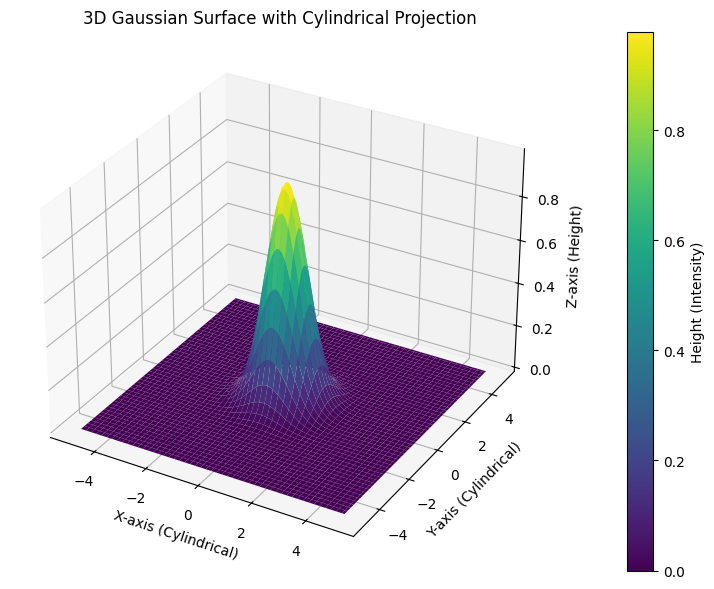

In [9]:
def gaussian(x, y):
    return np.exp(-(x**2 + y**2))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = gaussian(x, y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

R = np.sqrt(x**2 + y**2)
Theta = np.arctan2(y, x)
Z = z

X_cyl = R * np.cos(Theta)
Y_cyl = R * np.sin(Theta)

surface = ax.plot_surface(X_cyl, Y_cyl, Z, cmap='viridis', edgecolor='none')

ax.set_title('3D Gaussian Surface with Cylindrical Projection')
ax.set_xlabel('X-axis (Cylindrical)')
ax.set_ylabel('Y-axis (Cylindrical)')
ax.set_zlabel('Z-axis (Height)')

cbar = fig.colorbar(surface, ax=ax, pad=0.1)
cbar.set_label('Height (Intensity)')

plt.show()

#### Problem 04: “Plot Efficiency and Performance Optimization” 

In [10]:
import time

In [11]:
num_points = 1_000_000
x = np.random.rand(num_points)
y = np.random.rand(num_points)

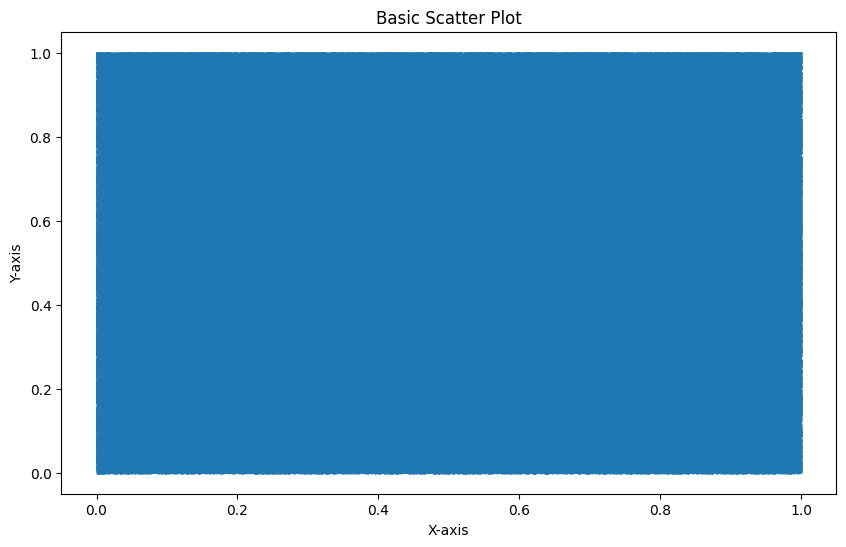

Time taken for basic scatter plot: 1.766272783279419 seconds


In [15]:
start_time = time.time()
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=1, alpha=0.5)
plt.title('Basic Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
print("Time taken for basic scatter plot:", time.time() - start_time, "seconds")

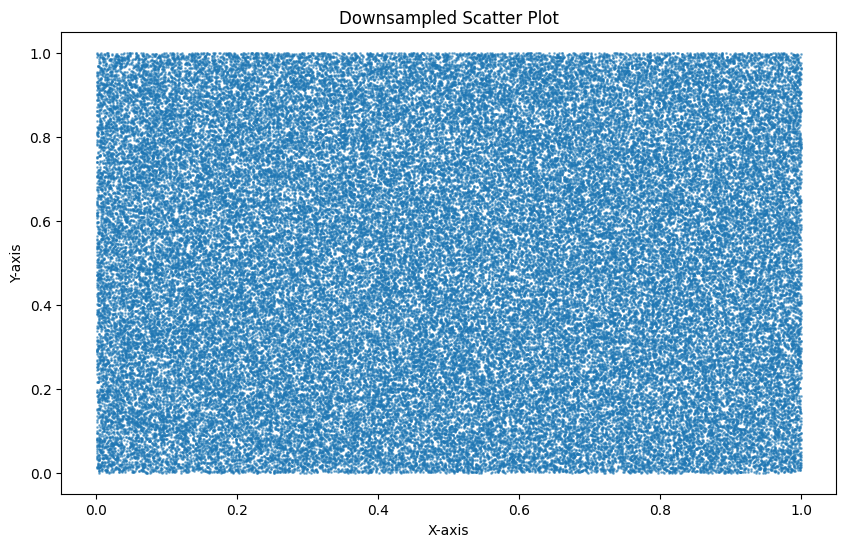

Time taken for downsampled scatter plot: 0.8774335384368896 seconds


In [14]:
downsample_rate = 0.1  
sample_indices = np.random.choice(num_points, size=int(num_points * downsample_rate), replace=False)

start_time = time.time()
plt.figure(figsize=(10, 6))
plt.scatter(x[sample_indices], y[sample_indices], s=1, alpha=0.5)
plt.title('Downsampled Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
print("Time taken for downsampled scatter plot:", time.time() - start_time, "seconds")


#### Problem 05: “Custom Colormaps and Data Normalization” 

In [16]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [17]:
np.random.seed(0)
data = np.random.rand(10, 10) * 100  

In [18]:
normalizer = Normalize(vmin=0, vmax=100)  
normalized_data = normalizer(data)

In [19]:
from matplotlib.colors import ListedColormap


In [22]:
colors = ['orange', 'white', 'pink'] 
custom_cmap = ListedColormap(colors)

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

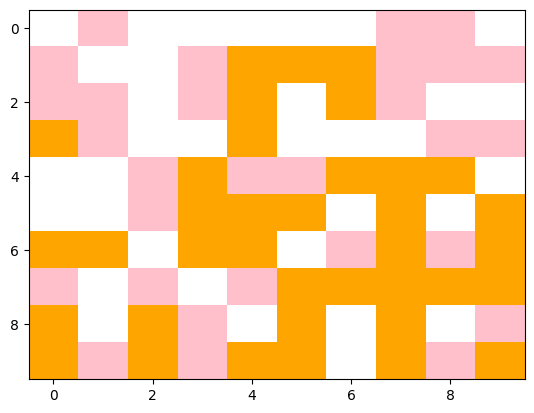

In [23]:
heatmap = plt.imshow(normalized_data, cmap=custom_cmap, aspect='auto', interpolation='nearest')
plt.colorbar(ScalarMappable(norm=normalizer, cmap=custom_cmap), label='Normalized Value')
plt.title('Heatmap with Custom Colormap and Normalization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()


#### Problem 06: “Subplots with Shared Axes and Complex Layouts” 

In [24]:
from matplotlib.gridspec import GridSpec

In [25]:
data1 = np.random.rand(10, 10) 
data2 = np.random.rand(10, 10)
data3 = np.random.rand(10, 10)
data4 = np.random.rand(10, 10)  

Text(0.5, 1.0, 'Subplot 4')

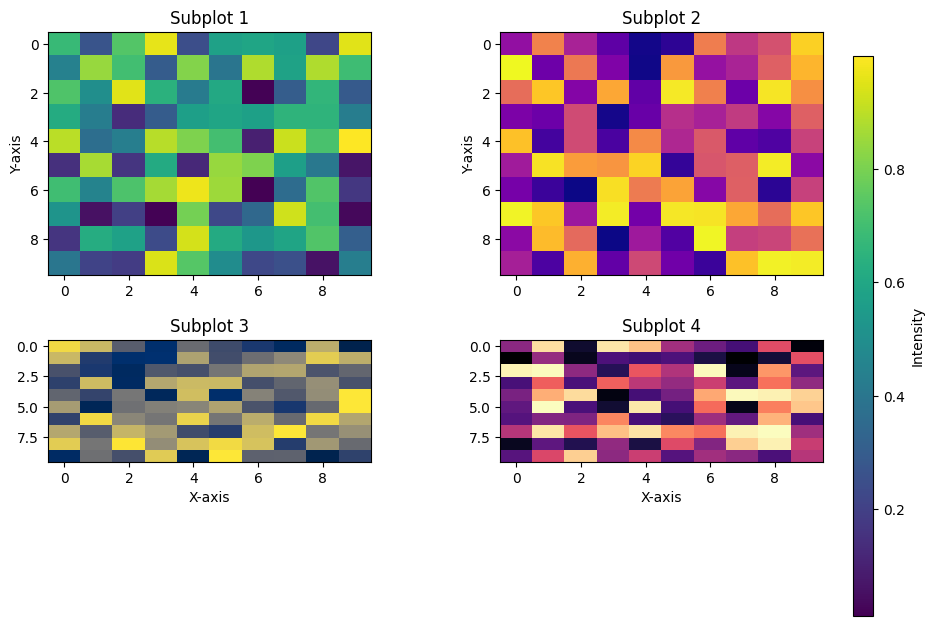

In [28]:
fig = plt.figure(figsize=(10, 8))
gs = GridSpec(3, 2, height_ratios=[2, 1, 1]) 

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[1, 0]) 
ax4 = fig.add_subplot(gs[1, 1])  

c1 = ax1.imshow(data1, cmap='viridis', aspect='auto')  
ax1.set_title('Subplot 1')

c2 = ax2.imshow(data2, cmap='plasma', aspect='auto')
ax2.set_title('Subplot 2')

c3 = ax3.imshow(data3, cmap='cividis', aspect='auto') 
ax3.set_title('Subplot 3')

c4 = ax4.imshow(data4, cmap='magma', aspect='auto')  
ax4.set_title('Subplot 4')

plt.subplots_adjust(hspace=0.4, wspace=0.4) 

cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7]) 
cbar = fig.colorbar(c1, cax=cbar_ax)
cbar.set_label('Intensity')

ax3.set_xlabel('X-axis')
ax4.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax2.set_ylabel('Y-axis')

plt.show()


#### Problem 07: “Interactive Data Visualization with Matplotlib and Widgets”

In [30]:
%pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\DNS\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/139.8 kB ? eta -:--:--
   -------------------- ------------------- 71.7/139.8 kB 4.1 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.8 kB 1.8 MB/s eta 0:00:01
   -------------------------- ------------- 92.2/139.8 kB 1.8 MB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139.8 kB 804.6 kB/s eta 0:00:01
   --------------------------------- ---- 122.9/139

In [31]:
from ipywidgets import interact, FloatSlider

In [32]:
def plot_sine_wave(amplitude, frequency):
    x = np.linspace(0, 10, 1000)
    y = amplitude * np.sin(2 * np.pi * frequency * x)

    plt.clf()
    plt.plot(x, y, label=f'Amp: {amplitude}, Freq: {frequency} Hz')
    plt.title('Interactive Sine Wave Plot')
    plt.xlabel('x')
    plt.ylabel('Amplitude')
    plt.ylim(-10, 10)
    plt.grid()
    plt.axhline(0, color='black', lw=0.5, ls='--')
    plt.legend()
    plt.show()


#### Problem 08: “Advanced Visualization Techniques with Subplots and Annotations” 

In [ ]:
import matplotlib.dates as mdates

In [ ]:
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

np.random.seed(0)
temperature = 20 + 10 * np.sin(np.linspace(0, 3 * np.pi, len(date_range))) + np.random.normal(0, 1, len(date_range))
humidity = 60 + 20 * np.cos(np.linspace(0, 3 * np.pi, len(date_range))) + np.random.normal(0, 2, len(date_range))

data = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Humidity': humidity})


In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)

ax1.plot(data['Date'], data['Temperature'], color='tab:red', label='Temperature (°C)')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.set_title('Temperature and Humidity Over One Year')
ax1.axhline(y=30, color='tab:red', linestyle='--', label='Heat Wave Alert')
ax1.legend()
ax1.grid()

ax2.plot(data['Date'], data['Humidity'], color='tab:blue', label='Humidity (%)')
ax2.set_ylabel('Humidity (%)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.axhline(y=75, color='tab:blue', linestyle='--', label='High Humidity Alert')
ax2.legend()
ax2.grid()

ax2.set_xlabel('Date')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.xaxis.set_major_locator(mdates.MonthLocator())

plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

ax1.annotate('Summer Solstice', xy=('2023-06-21', 30), xytext=('2023-03-21', 32),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
ax2.annotate('Winter Solstice', xy=('2023-12-21', 80), xytext=('2023-09-21', 60),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.tight_layout()
plt.show()
